---
## Handling Overfitting with CIFAR-10 (Images)
---

#### *Task goal*

######  I want to train a feed-forward neural network (Dense Neural Network) on the CIFAR-10 dataset (small color images of 10 object classes), So that I can explore how regularization techniques (dropout, early stopping, weight decay) help reduce overfitting on more complex datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

---
#### load data
---

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


---
#### train and  split data
---

In [3]:
# train and split data
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

---
#### building the model
---

In [7]:
#building the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

print(model.summary())

c:\Users\bbuser\Desktop\DataSience-brain-bytes\DataScience-Brain-Bytes\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.1601 - loss: 2.2115 - val_accuracy: 0.2331 - val_loss: 2.0535
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.1712 - loss: 2.1361 - val_accuracy: 0.2432 - val_loss: 2.0382
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.1872 - loss: 2.1079 - val_accuracy: 0.2455 - val_loss: 2.0620
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.2010 - loss: 2.0727 - val_accuracy: 0.2711 - val_loss: 2.0109
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.2074 - loss: 2.0633 - val_accuracy: 0.2767 - val_loss: 1.9969
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.2125 - loss: 2.0539 - val_accuracy: 0.2749 - val_loss: 1.9986
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.2144 - loss: 2.0497 - val_accuracy: 0.2536 - val_loss: 2.0307
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.2164 - loss: 2.0461 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121,824 (19.54 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,414,550 (13.03 MB)

None


---
#### EVALUATE THE MODEL
---

In [5]:
#evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2964 - loss: 1.9823
Test Loss: 1.9823178052902222, Test Accuracy: 0.2964000105857849
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.43      0.33      0.37       973
           1       0.36      0.31      0.34       979
           2       0.24      0.02      0.04      1030
           3       0.19      0.08      0.11      1023
           4       0.27      0.36      0.31       933
           5       0.39      0.22      0.28      1015
           6       0.24      0.36      0.29       996
           7       0.19      0.42      0.26       994
           8       0.44      0.35      0.39      1017
           9       0.35      0.51      0.42      1040

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.28     10000
weighted avg       0.31      0.30      0.28     10000



---
#### plot the data 
---

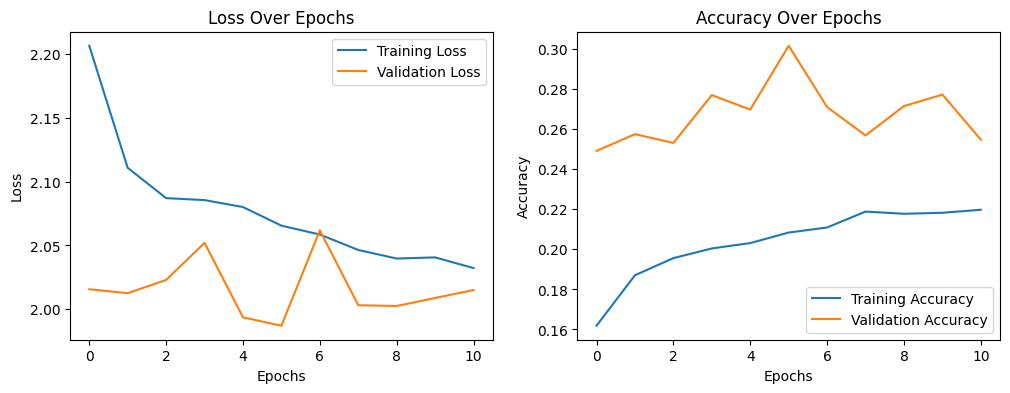

In [6]:
# plot the data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

---
## Q & A
---

### 1. How does adding dropout layers affect training vs validation accuracy?
- **Training Accuracy**: Usually decreases because dropout randomly disables neurons, preventing the network from relying too much on specific activations.  
- **Validation Accuracy**: Often improves, since dropout reduces overfitting by encouraging more robust feature learning.  
 In this model, dropout at 512 and 256 units likely slows training accuracy growth but stabilizes validation accuracy.  

---

### 2. Does early stopping prevent wasted training time?
-  Yes.  
- It monitors validation loss/accuracy and stops training when no improvement is observed for several epochs (patience).  
- Prevents overfitting and saves compute resources by halting training before the model memorizes the training set.  

---

### 3. Can L2 weight regularization improve generalization?
- **Yes** — L2 (weight decay) penalizes large weights, encouraging the model to spread importance across neurons instead of relying on a few.  
- Helps reduce variance and prevents extreme weight growth, improving test set generalization.  
- In CIFAR-10, adding `kernel_regularizer=tf.keras.regularizers.l2(0.001)` to dense layers would help stabilize validation accuracy.  

---

### 4. How does model depth affect overfitting on CIFAR-10?
- **Shallow Models (few layers)**: May underfit, failing to capture complex image patterns.  
- **Deeper Models**: Can capture richer features, but risk severe overfitting without dropout/regularization.  
- For CIFAR-10:  
  - Adding more layers increases capacity, but requires **batch normalization, dropout, and weight decay** to avoid memorization.  
  - Too deep without these → training accuracy skyrockets, validation accuracy drops.  
